
Pump and Signal/idler wavelengths: [405, 810]
n(e ray) values BBO: [1.5671241459050829, 1.5441811980421354]
n(o ray) values BBO: [1.6922993830562731, 1.6610724058370865]

Minimum value: Type 1 8.491514158492919e-10
Phase matching angle for BBO[29.70838013]
Minimum value: Type 2 5.000191372062091e-10
Phase matching angle for BBO:Type 2 [43.3613464]

Pump and Signal/idler wavelengths: [405, 810]
n(e ray) values KDP: [2.188265280670058, 2.140780615855943]
n(o ray) values KDP: [2.3207227058907445, 2.25359668549639]

Minimum value: Type 1 9.83227277373544e-10
Phase matching angle for KDP[45.46372013]
Minimum value: Type 2 4.3370373958850905e-10
Phase matching angle for KDP:Type 2 [73.06726872]


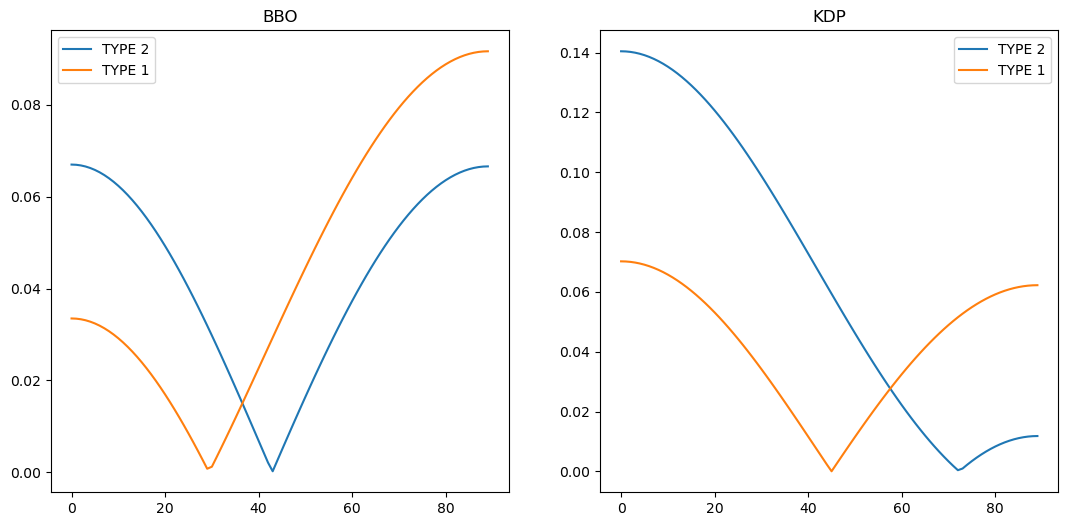

In [23]:
"""
Author: [Decoherence]
Date: [11 04 2023]

Description: This code calculates the phase matching angle for Type 1 and Type 2
phase matching in two different nonlinear crystals, BBO (Beta-Barium Borate) and
KTP (Potassium Titanyl Phosphate). It uses the Sellmeier equations  to calculate 
the refractive indices for the extraordinary (ne) and ordinary (no) rays at given
wavelengths, and then finds the angle at which the phase matching condition    is 
satisfied for each crystal. The results are    plotted and printed, including the 
minimum values of the objective functions for Type 1 and Type 2 phase    matching,
the corresponding phase matching angles, and the refractive indices for both rays 
in each crystal.

"""

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
for b in range(0,2):
    if b==0:
        st='BBO'
        a1, b1, c1, d1 = 2.7405, 0.0184, 0.0179, 0.0155
        a2, b2, c2, d2 = 2.3753, 0.01224, 0.01667, 0.01516
        wavelengths = [405, 810]
        
        def calc_no(l):
            l = l / 1000
            return np.sqrt(a1 + (b1) / (l**2 - c1) - d1 * (l**2))
        def calc_ne(l):
            l = l / 1000
            return np.sqrt(a2 + ((b2) / (l**2 - c2)) - d2 * (l**2))

    if b==1:
        st='KDP'
        a1, b1, c1, d1, e1 = 2.259276, 0.01008956, 0.012942625, 13.00522, 400
        a2, b2, c2, d2, e2 = 2.132668, 0.008637494, 0.012281043, 3.2279924, 400
        wavelengths = [405, 810]

        def calc_no(l):
            l = l / 1000
            no = a1 + (b1 / (l**2 - c1)) + (d1*(l**2) / (l**2 - e1))
            return no

        def calc_ne(l):
            l = l / 1000
            ne = a2 + (b2 / ((l**2) - c2)) + (d2*(l**2) / ((l**2) - e2))
            return ne
        
    ne_values = [calc_ne(l) for l in wavelengths]
    no_values = [calc_no(l) for l in wavelengths]

    print()

    def function(theta):
        s = ((np.cos(theta))**2/no_values[0]**2) + ((np.sin(theta))**2/ne_values[0]**2)
        nee = np.sqrt(1/s)
        k = ((np.cos(theta))**2/no_values[1]**2) + ((np.sin(theta))**2/ne_values[1]**2)
        nex = np.sqrt(1/k)
        func=2*nee- (nex*np.cos(3 * np.pi / 180)+ (no_values[1]*np.cos(3 * np.pi / 180)))
        return np.abs(func)

    def function2(theta):
        s = ((np.cos(theta))**2/no_values[0]**2) + ((np.sin(theta))**2/ne_values[0]**2)
        nee = np.sqrt(1/s)
        func=nee-(no_values[1]*np.cos(3 * np.pi / 180))
        return np.abs(func)


    x0 = 1
    # Call the minimize function
    result = minimize(function, x0)
    result2 = minimize(function2, x0)

    # Extract the minimum value and the corresponding argument
    min_value = result.fun
    min_argument = result.x * 180 / np.pi
    min_value2 = result2.fun
    min_argument2 = result2.x * 180 / np.pi
    
    plt.subplot(1, 2, b + 1)
    plt.title(f"{st}")
    theta=np.linspace(0,3.14/2,90)
    plt.plot(function(theta),label= 'TYPE 2')
    theta=np.linspace(0,3.14/2,90)
    plt.plot(function2(theta),label= 'TYPE 1')
    plt.legend()

    # Print the results
    print(f"Pump and Signal/idler wavelengths: {wavelengths}")
    print(f"n(e ray) values {st}: {ne_values}")
    print(f"n(o ray) values {st}: {no_values}")
    print('')
    print(f"Minimum value: Type 1 {min_value2}")
    print(f"Phase matching angle for {st}{min_argument2}")
    print(f"Minimum value: Type 2 { min_value}")
    print(f"Phase matching angle for {st}:Type 2 {min_argument}")

